In [1]:
#start imports
import numpy as np
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
import os

In [2]:
def loadxmlTrajs(xmlfile):
    """ 
    Load xml files into a python dictionary with the following structure:
        tracks = {'0': {'nSpots': 20, 'trackData': numpy.array(t, x, y, z) }}
    Tracks should be xml file from 'Export tracks to XML file',
    that contains only track info but not the features.
    Similar to what 'importTrackMateTracks.m' needs.
    """
    try:
        tree = et.parse(xmlfile)
    except OSError:
        print('Failed to read XML file {}.'.format(xlmfile) )
    root =  tree.getroot()
    # print(root.attrib)  # or extract metadata
    nTracks = int(root.attrib['nTracks'])
    print(nTracks)
    tracks = {}
    for i in range(nTracks):
        trackIdx = str(i)
        tracks[trackIdx] = {}
        nSpots = int(root[i].attrib['nSpots'])
        tracks[trackIdx]['nSpots'] = nSpots
        trackData = np.array([ ]).reshape(0, 4)
        for j in range(nSpots):
            t = float(root[i][j].attrib['t'])
            x = float(root[i][j].attrib['x'])
            y = float(root[i][j].attrib['y'])
            z = float(root[i][j].attrib['z'])
            spotData = np.array([t, x, y, z])
            trackData = np.vstack((trackData, spotData))
        tracks[trackIdx]['trackData'] = trackData
    return tracks, nTracks

In [ ]:
def split_list(originalList, posOfBreaks):
    newPOB=np.zeros(len(posOfBreaks), dtype=int)
    count=0
    for x in posOfBreaks:
        newPOB[count]=x
        count+=1
    print(newPOB)
    print(len(originalList))
    # Initialize the result list
    result = []
    # Initialize the start index
    start = 0
    
    # Loop through the posOfBreaks to create sub-lists
    for pos in newPOB:
        # Append the sub-list from start to pos
        result.append(originalList[start:pos])
        # Update the start index
        start = pos
    
    # Handle the final segment
    result.append(originalList[start:])
    
    return result

# This function processes the xml tracks into an easier format for plotting
def processingTracks(tracks):
    overallCounter=0
    newTracks={}
    for x in tracks.keys():
        arr=tracks[str(x)]['trackData']
        posOfBreaks=[]
        timeInit=arr[0][0]
        lastXY=[arr[0][1], arr[0][2]]
        count=0
        for time, xpos, ypos, som in arr:
            if np.sqrt((xpos-lastXY[0])**2 + (ypos-lastXY[1])**2)>15:
                posOfBreaks+=[count]
            count+=1
            lastXY=[xpos, ypos]
        if len(posOfBreaks)>=1:
            temp = split_list(arr, posOfBreaks)
            for arrays in temp:
                newTracks[str(overallCounter)]=arrays
                overallCounter+=1
        else:
            newTracks[str(overallCounter)]=arr
            overallCounter+=1
    return newTracks

# This function excludes large jumps in the tracks.
def excludetracks(tracks):
    overallCounter=0
    newTracks={}
    for x in tracks.keys():
        arr=tracks[str(x)]
        lastXY=[arr['trackData'][0][1], arr['trackData'][0][2]]
        knower=False
        for time, xpos, ypos, som in arr['trackData']:
            if np.sqrt((xpos-lastXY[0])**2 + (ypos-lastXY[1])**2)>20:
                knower=True
            else:
                continue
            lastXY=[xpos, ypos]
        if not knower:
            newTracks[str(overallCounter)]=arr
            overallCounter+=1
    return newTracks

281


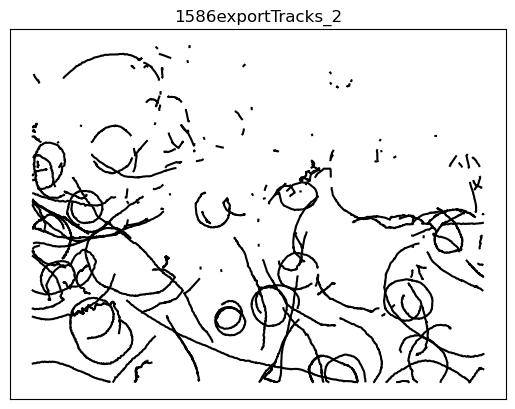

81
81


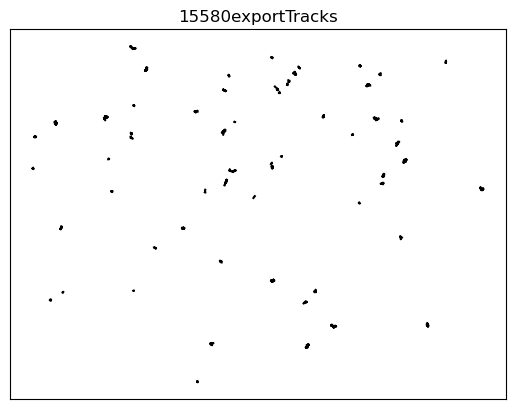

77
77


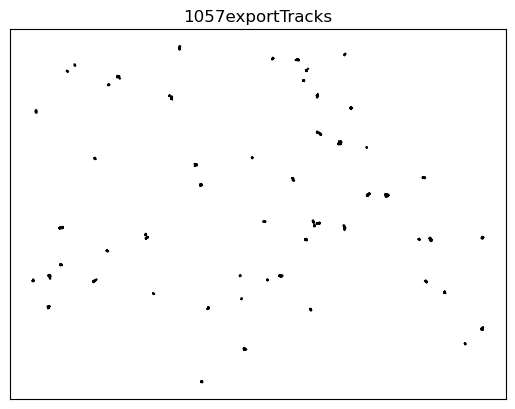

487


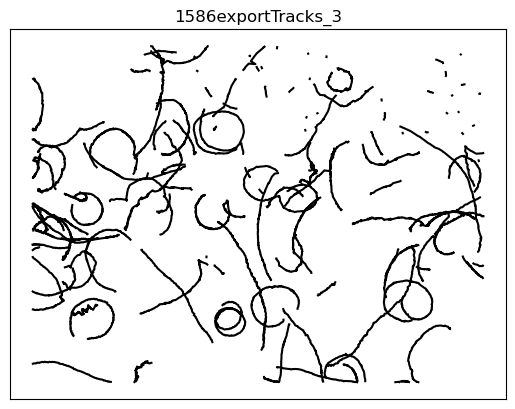

75
75


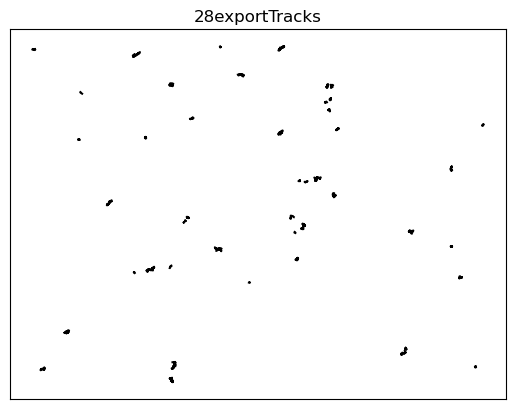

171
171


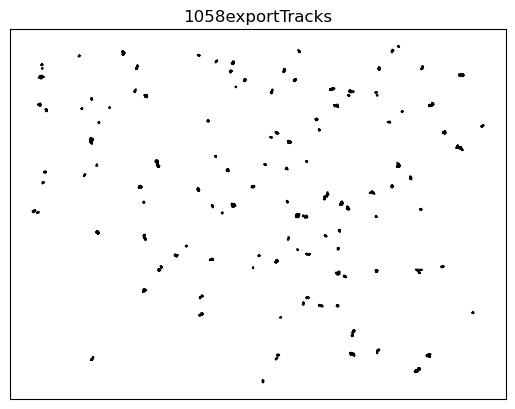

125
125


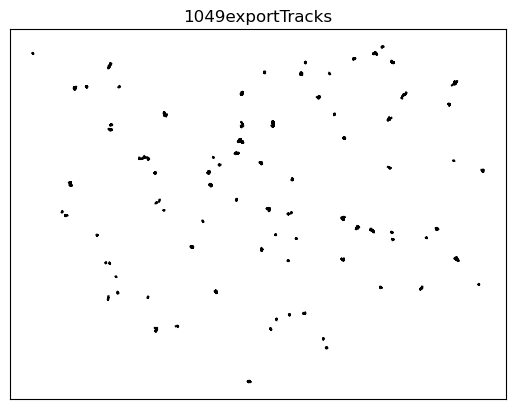

144
144


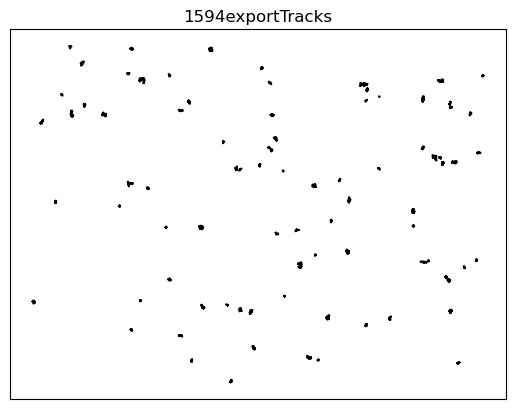

149


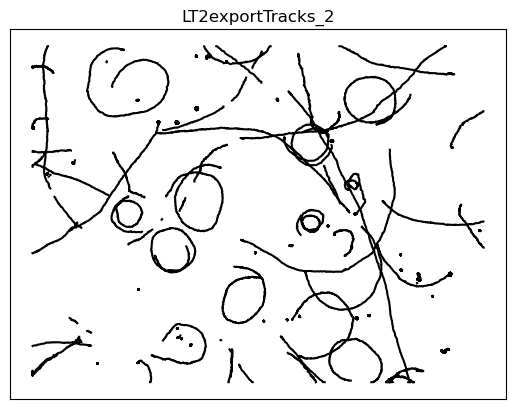

195
195


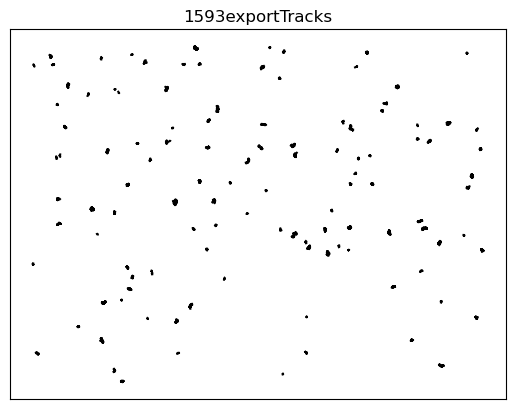

154
154


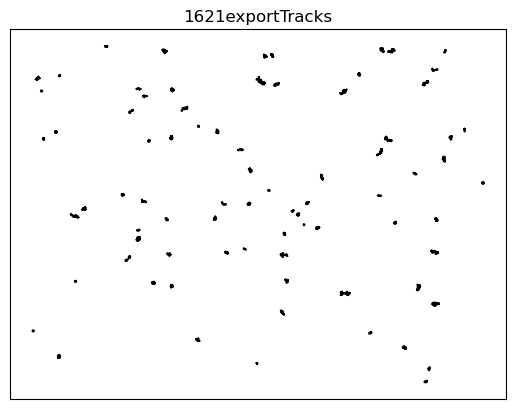

822


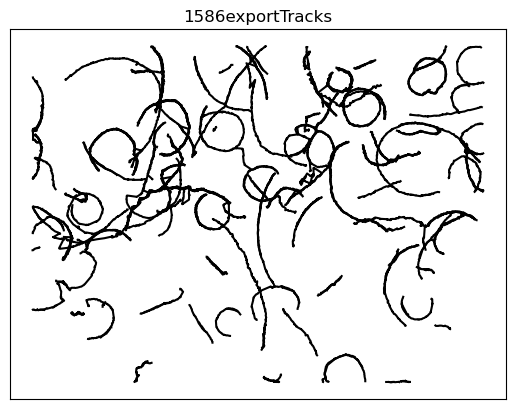

113


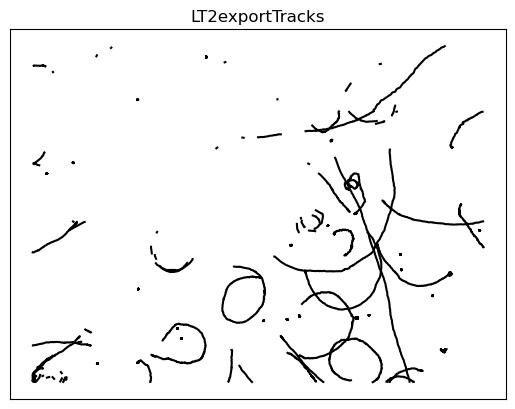

43
43


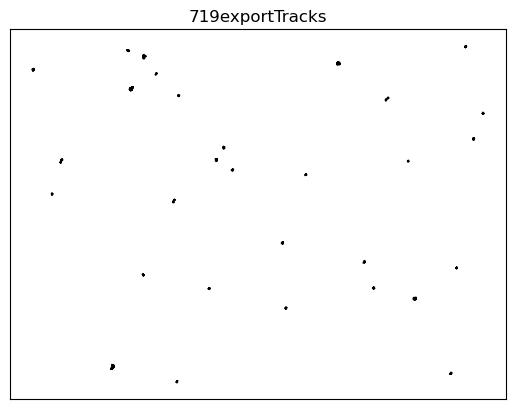

In [ ]:
direct="cell_tracking_tracks/" #directory with xml files
for filename in os.listdir(direct):
    if filename[0] == '.':
        continue
    if (filename[0:3]=='LT2') or (filename[0:4]=='1586'):
        tracks, trackIDs = loadxmlTrajs(direct + filename)
    else: #remove tracks with big jumps
        tracks, trackIDs = excludetracks(loadxmlTrajs(direct + filename)[0]), loadxmlTrajs(direct + filename)[1] 

    for x in tracks.keys():
        if int(x)>200: #limits number of tracks to plot to 200
            break
        plt.plot(tracks[str(x)]['trackData'][:,1], 
                tracks[str(x)]['trackData'][:,2], color='Black', linewidth=1.5) #creating the plot
    ax = plt.gca()

    # Hide X and Y axes label marks
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)

    # Hide X and Y axes tick marks
    ax.set_xticks([])
    ax.set_yticks([])

    plt.savefig("cell_tracking_plots/" + filename[:-4] + ".png", dpi=300, bbox_inches='tight')
    plt.title(filename[:-4])
    plt.show()